The current downscale scale space is a really lazy solution and throws out data.
Solution: use custom difference-of-gaussians kernel, with adaptive sigma value

idea: implement actual size of image in calculation, and have sigma with units [length], instead of unitless/[px].

In [9]:
import cv2 as cv
import numpy as np
from skimage.color import rgb2gray
from numpy.lib.stride_tricks import sliding_window_view
import matplotlib.pyplot as plt
from modules import ddx_gaussian_convolve, generate_ddx_gaussian_kernels
import scipy.ndimage as ndi

# ndi.gaussian_filter(image, sigma, order=(1, 0))

drum = rgb2gray(cv.imread("drumhead.jpg"))
# plt.imshow(drum)

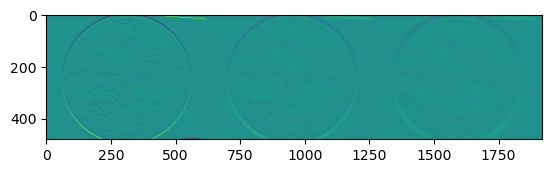

In [25]:
# plt.imshow(ndi.gaussian_filter(drum, sigma=.5, order=(1, 0)))
blurred_images = [ndi.gaussian_filter(drum, sigma=i, order=(1, 0)) for i in range(1, 10, 3)]
plt.imshow(cv.hconcat(blurred_images))

In [4]:
# ix, iy = ddx_gaussian_convolve(drum, sigma=3, std_cutoff=2)
# ix2, iy2 = ddx_gaussian_convolve(drum, sigma=5, std_cutoff=3)
# plt.imshow(ix - ix2)

In [6]:
# # (ix - ix2).max()
# print(type(ix), ix.shape, ix.dtype)
# np.abs(ix).mean()

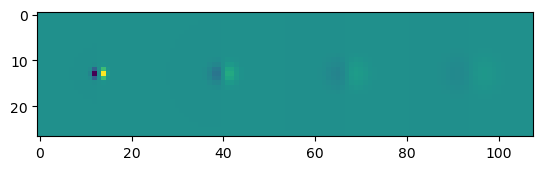

In [7]:
ddx, _ = generate_ddx_gaussian_kernels(sigma=3, kernel_radius=9)
kernels = [generate_ddx_gaussian_kernels(sigma=i, kernel_radius=13)[0] for i in range(1, 5)]
plt.imshow(cv.hconcat(kernels))

In [8]:
for kernel in kernels:
    print(np.abs(kernel).sum())

0.9999999999999999
1.0000000000000002
1.0000000000000002
1.0
